In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
df = pd.read_excel("VASAseq-CDR3-IGH-clones.xlsx", index_col=0)
print("entries:", len(df))
df.head()

entries: 3073


,cdr3pep,freq,Sample,Patient
0,CARGAVSLTVTPRGYFDLW,1,TCTCACAC,A10
1,CARGSGSLTVTPRGYFDLW,1,TCTCACAC,A10
2,CARGSVSLTATPRGYFDLW,1,TCTCACAC,A10
3,CARGSVSLTVTPRGYCDLW,1,TCTCACAC,A10
4,CARGSVSLTVTPRGYFDLW,10,TCTCACAC,A10


In [3]:
# ASC B cells: K1-24, D19-21
asc = list()
for i in range(1,25):
    asc.append("K" + str(i))
for i in range(19,22):
    asc.append("D" + str(i))
print(asc)

['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24', 'D19', 'D20', 'D21']


In [4]:
# Get ASC clones
df_asc = df[df['Patient'].isin(asc)]
print("Entries:", len(df_asc))
df_asc.head()

Entries: 2426


,cdr3pep,freq,Sample,Patient
39,CAIVKEYDFGGMDVW,1,TAAGGTCC,D20
40,CARVEEYEKGGMDVW,1,TAAGGTCC,D20
41,CARVKECDFGGMDVW,1,TAAGGTCC,D20
42,CARVKEDDFGGMDVW,4,TAAGGTCC,D20
43,CARVKEHDFGGMDVW,1,TAAGGTCC,D20


In [5]:
# Remove ASC clones from original clones table
df = df[~df['cdr3pep'].isin(df_asc['cdr3pep'])]
print("Entries:", len(df))
df.head()

Entries: 376


,cdr3pep,freq,Sample,Patient
0,CARGAVSLTVTPRGYFDLW,1,TCTCACAC,A10
1,CARGSGSLTVTPRGYFDLW,1,TCTCACAC,A10
2,CARGSVSLTATPRGYFDLW,1,TCTCACAC,A10
3,CARGSVSLTVTPRGYCDLW,1,TCTCACAC,A10
4,CARGSVSLTVTPRGYFDLW,10,TCTCACAC,A10


In [6]:
print(sorted(df['Patient'].unique()))
print("Wells left:", df['Patient'].nunique())

['A10', 'A11', 'A12', 'A13', 'A16', 'A18', 'A9', 'B13', 'B14', 'B15', 'B16', 'C1', 'C10', 'C12', 'C15', 'C17', 'C2', 'C24', 'C4', 'C5', 'C8', 'D1', 'D11', 'D12', 'D14', 'D18', 'D2', 'D23', 'D24', 'D3', 'D6', 'D7', 'D8', 'D9', 'E1', 'E11', 'E12', 'E13', 'E14', 'E17', 'E19', 'E2', 'E22', 'E24', 'E4', 'E5', 'E6', 'E8', 'F10', 'F12', 'F16', 'F19', 'F2', 'F20', 'F21', 'F23', 'F24', 'F3', 'F4', 'F6', 'F7', 'F8', 'F9', 'G10', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G24', 'G4', 'G6', 'G8', 'G9', 'H1', 'H10', 'H12', 'H15', 'H16', 'H17', 'H18', 'H19', 'H21', 'H22', 'H3', 'H6', 'H7', 'H8', 'I10', 'I12', 'I14', 'I15', 'I17', 'I2', 'I21', 'I23', 'I24', 'I3', 'I5', 'I6', 'I7', 'I8', 'J1', 'J10', 'J11', 'J12', 'J14', 'J15', 'J16', 'J18', 'J2', 'J20', 'J21', 'J23', 'J24', 'J6', 'J7', 'J8', 'L2', 'L7', 'M12', 'M14', 'N13', 'N3']
Wells left: 129


## Determine distance between samples

In [7]:
df_pivot = df.pivot_table(columns=['Patient','Sample'], index='cdr3pep', values='freq')
df_pivot = df_pivot.fillna(0)
df_pivot.head()

Patient,A10,A11,A12,A13,A16,A18,A9,B13,B14,B15,...,J24,J6,J7,J8,L2,L7,M12,M14,N13,N3
Sample,TCTCACAC,TACTGGTA,ACGATAGG,GATGTCGA,CTTTGACA,GAGTCCTG,TGAATACC,ACCTCAGC,GGTGGACT,GACAAACC,...,AAGGTCAG,TAGCTACC,GACTTGAG,TTCAGCGT,ATAGCTGC,AGGAGACT,ACCAAGGA,AGTACGTG,CACCATGT,CTCGTACT
cdr3pep,,,,,,,,,,,,,,,,,,,,,
CAAEGGGELHCYW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAASPGIEAAAKNWLDPW,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CADIRAYDSPLW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CADIWAHESPLW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CADIWAYDSPLW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
sim = 1 - pairwise_distances(df_pivot.T, metric = "braycurtis")
sim = pd.DataFrame(sim, index=df_pivot.columns, columns=df_pivot.columns)
sim.head()

,Patient,A10,A11,A12,A13,A16,A18,A9,B13,B14,B15,...,J24,J6,J7,J8,L2,L7,M12,M14,N13,N3
,Sample,TCTCACAC,TACTGGTA,ACGATAGG,GATGTCGA,CTTTGACA,GAGTCCTG,TGAATACC,ACCTCAGC,GGTGGACT,GACAAACC,...,AAGGTCAG,TAGCTACC,GACTTGAG,TTCAGCGT,ATAGCTGC,AGGAGACT,ACCAAGGA,AGTACGTG,CACCATGT,CTCGTACT
Patient,Sample,,,,,,,,,,,,,,,,,,,,,
A10,TCTCACAC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11,TACTGGTA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12,ACGATAGG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A13,GATGTCGA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A16,CTTTGACA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
excel_file = "VASAseq-noASC-CDR3-IGH.xlsx"
sim.to_excel(excel_file)
print("Wrote", excel_file, "to disk")

Wrote VASAseq-noASC-CDR3-IGH.xlsx to disk


## Create a heatmap

In [10]:
def drawBox(end, length):
    '''
    Description: draw a square with lines
    In: start (int), length (int)
    Out: None, 4 lines will be drawn on the canvas
    '''
    linewidth = 5
    low = end - length
    high = end
    plt.plot([low, high], [high, high], 'k-', lw=linewidth)   # N
    plt.plot([high, high], [low, high], 'k-', lw=linewidth)   # E
    plt.plot([low, high], [low, low], 'k-', lw=linewidth)     # S
    plt.plot([low, low], [low, high], 'k-', lw=linewidth)     # W

In [11]:
def drawHeatmap(overlap):
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 22}

    matplotlib.rc('font', **font)

    fig, ax = plt.subplots(figsize=(60, 60))
    fig.subplots_adjust(bottom=0.3)

    # is used for log scaling
    Z1 = overlap.values
    Z1[Z1 <= 0] = Z1[Z1 > 0].min()  # Replace any value below or equal to zero with lowest value above zero
    
    print("min value:", Z1.min())
    print("max value:", Z1.max())

    # get the patient-id
    labels_x = [x[0] for x in overlap.index]
    labels_y = [y[0] for y in overlap.columns]

    # draw heatmap
    plt.pcolor(overlap.values, cmap=plt.cm.viridis, norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()))
    #plt.pcolor(overlap.values, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.yticks(np.arange(0.5, len(overlap.index), 1), overlap.columns, rotation=0)
    plt.xticks(np.arange(0.5, len(overlap.columns), 1), overlap.index, rotation=90)

    # Add lines around same patient-id
    prev_label = None
    length = 0
    for i in range(len(labels_x)):
        if prev_label is not None and prev_label != labels_x[i]:
            drawBox(i, length)
            length = 0
        prev_label = labels_x[i]
        length +=1
    i += 1
    drawBox(i, length)

    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

min value: 0.013698630136986356
max value: 1.0
Wrote VASAseq-noASC-CDR3-IGH.pdf to disk


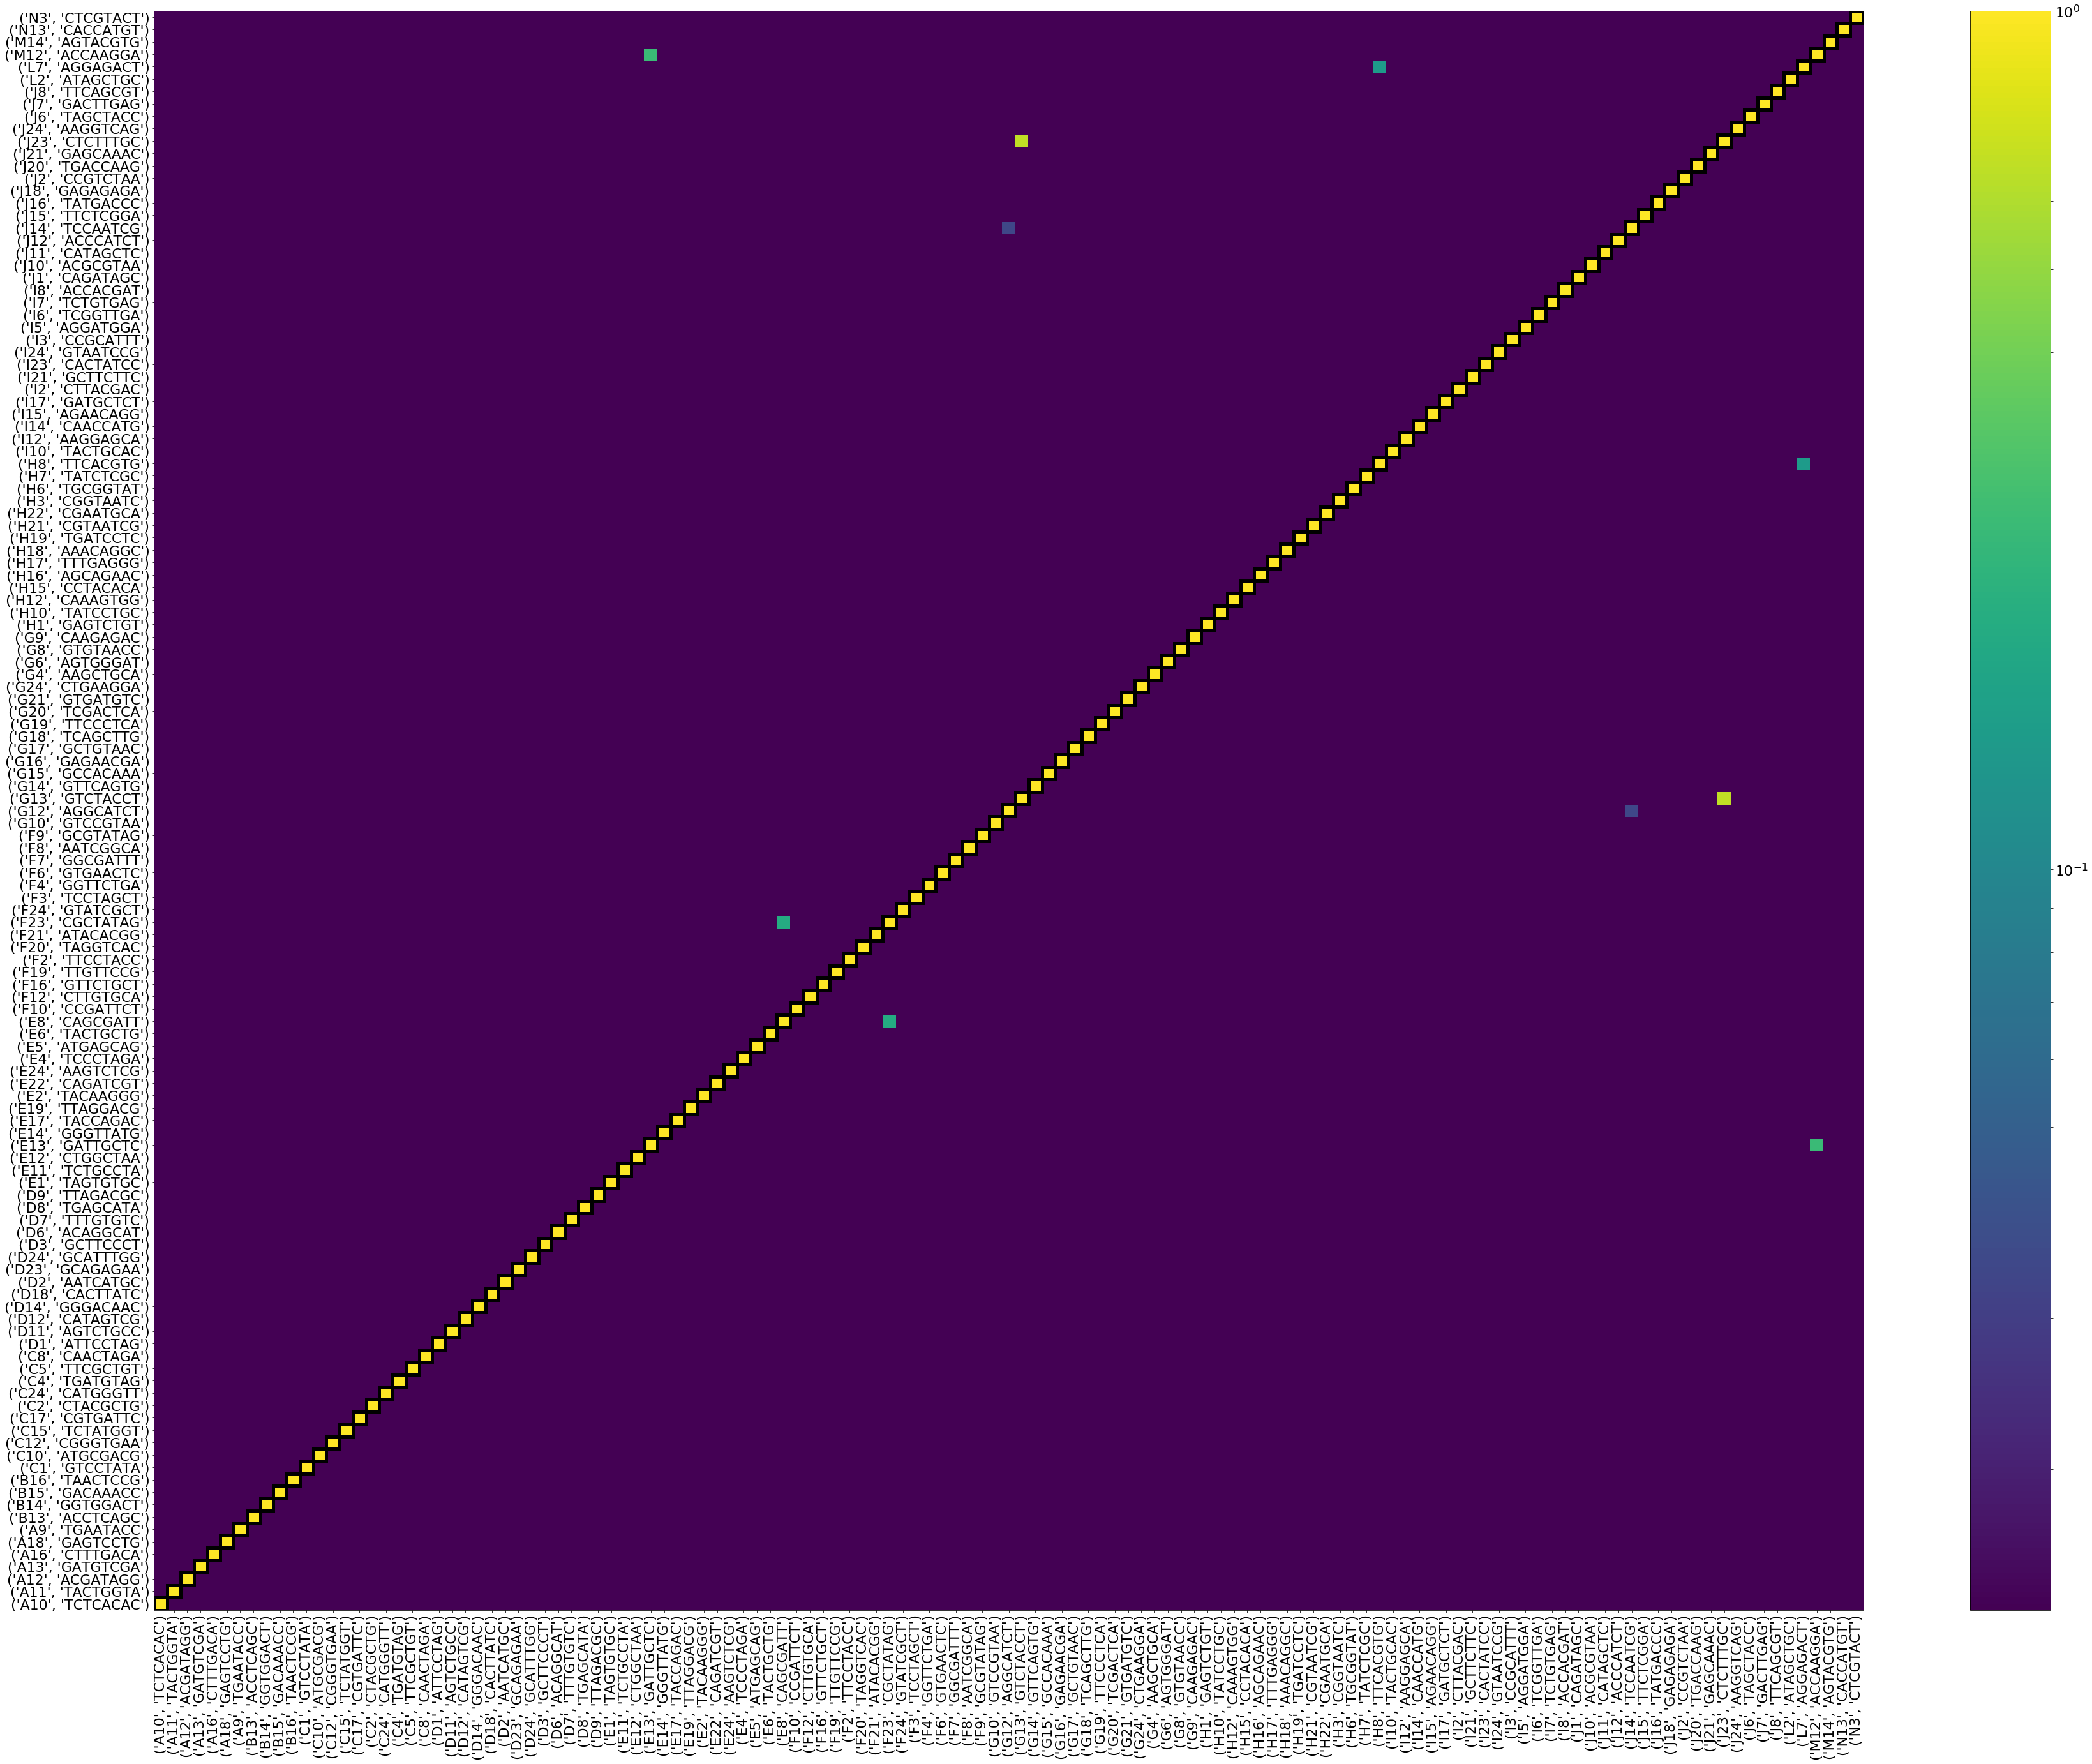

In [12]:
plotfile = "VASAseq-noASC-CDR3-IGH.pdf"
drawHeatmap(sim)

## Highlight anomalies

In [13]:
# get index pairs of same patient (divide same vs not same sample) and list indices for different patients
same_sample = list()
same_patient = list()
diff_patient = list()
for x in sim.index:
    for y in sim.columns:
        if x[0] == y[0]:  # same patient
            if x[1] == y[1]:  # same sample
                same_sample.append((x, y))
            else:        # same patient, but not same sample
                same_patient.append((x, y))
        else:             # not same patient
            diff_patient.append((x,y))    

In [14]:
# Get values of same patient (but different samples) and values for different patients
values_same_patient = [sim.loc[x][y] for x,y in same_patient]
values_diff_patient = [sim.loc[x][y] for x,y in diff_patient]
mean_diff_patient = np.mean(values_diff_patient)
std_diff_patient = np.std(values_diff_patient)
threshold = mean_diff_patient + 4 * std_diff_patient
print("mean same patient", np.mean(values_same_patient), np.std(values_same_patient))
print("mean diff patient", mean_diff_patient, std_diff_patient)
print("threshold", threshold)

mean same patient nan nan
mean diff patient 0.013845627255349565 0.008010223611890861
threshold 0.04588652170291301


/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/barbera/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'boxes': [<matplotlib.lines.Line2D at 0x7fce227d3eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce227dd908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fce227e45c0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fce227e4198>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fce227dd048>,
  <matplotlib.lines.Line2D at 0x7fce227ee2e8>]}

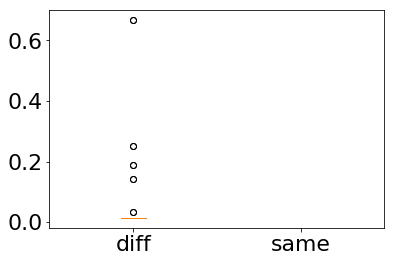

In [15]:
# Boxplot
plt.boxplot([values_diff_patient, values_same_patient], labels=['diff', 'same'])

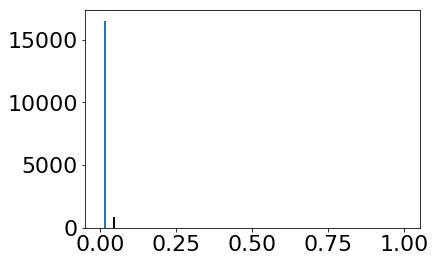

In [16]:
# Histogram
plt.hist(values_diff_patient, bins=100)
plt.hist(values_same_patient, bins=100)
plt.plot([threshold, threshold], [0, 750], 'k-', lw=2)

In [17]:
suspects_list = "VASAseq-noASC-CDR3-IGH.txt"
# Print sample names if similarity is twice the 95% interval
fhOut = open(suspects_list, "w")
check_samples = list()
for i,j in diff_patient:
    if sim.loc[i][j] > threshold:
        print(i, j, sim.loc[i][j])
        print(i, j, sim.loc[i][j], file=fhOut)
        check_samples.append((i,j))
fhOut.close()
print("Wrote", suspects_list, "to disk")

('E13', 'GATTGCTC') ('M12', 'ACCAAGGA') 0.25
('E8', 'CAGCGATT') ('F23', 'CGCTATAG') 0.18867924528301883
('F23', 'CGCTATAG') ('E8', 'CAGCGATT') 0.18867924528301883
('G13', 'GTCTACCT') ('J23', 'CTCTTTGC') 0.6666666666666667
('H8', 'TTCACGTG') ('L7', 'AGGAGACT') 0.1428571428571429
('J23', 'CTCTTTGC') ('G13', 'GTCTACCT') 0.6666666666666667
('L7', 'AGGAGACT') ('H8', 'TTCACGTG') 0.1428571428571429
('M12', 'ACCAAGGA') ('E13', 'GATTGCTC') 0.25
Wrote VASAseq-noASC-CDR3-IGH.txt to disk


In [18]:
sim2 = sim.copy()
for i, j in check_samples:
    sim2.loc[i][j] = 1

min value: 0.013698630136986356
max value: 1.0
Wrote VASAseq-noASC-CDR3-IGH-highlighted.pdf to disk


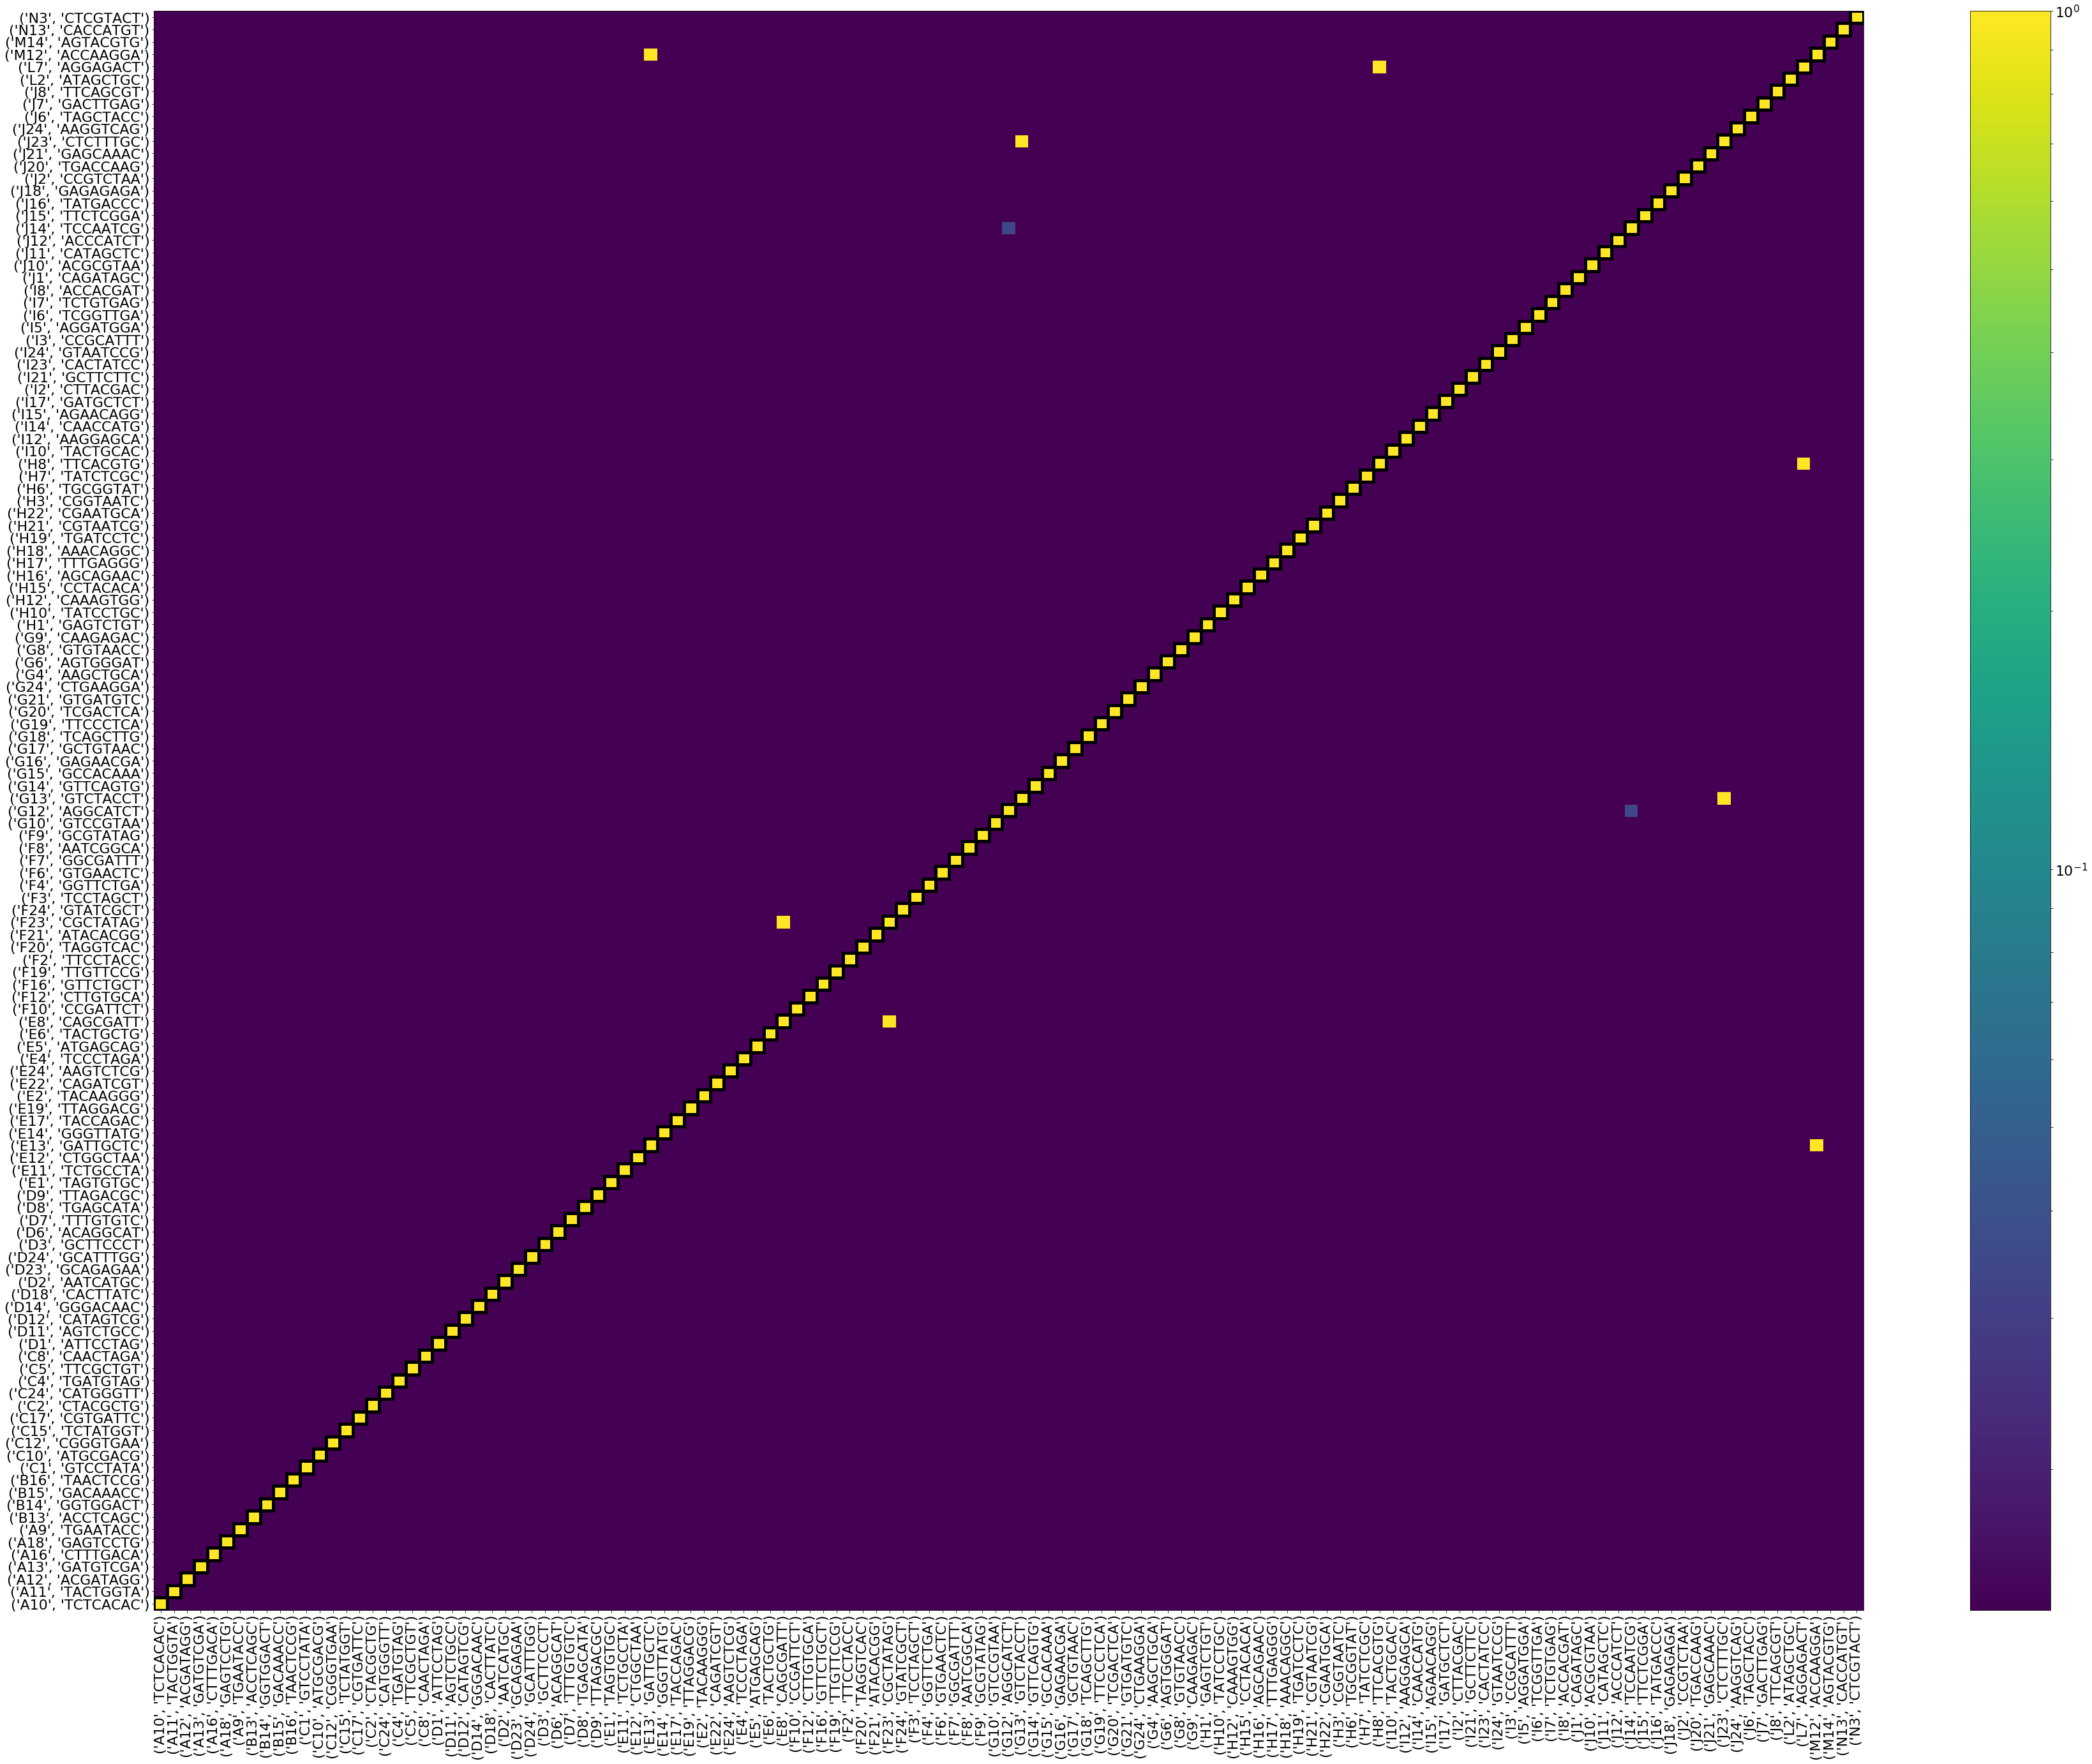

In [19]:
plotfile = plotfile.replace('.pdf', '-highlighted.pdf')
drawHeatmap(sim2)

# Shared clones direction

In [20]:
outfile = "runXX-VASAseq-noASC-IGH-HUMAN-shared-clones.xlsx"

In [21]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,AAACAGGC,6
1,AAGCTGCA,5
2,AAGGAGCA,3
3,AAGGTCAG,15
4,AAGTCTCG,6


In [22]:
# Result columns should be: Patient, Sample, cdr3pep, freq, totalreads
df = pd.merge(df, df_total, on="Sample")
df.head()

,cdr3pep,freq,Sample,Patient,totalreads
0,CARGAVSLTVTPRGYFDLW,1,TCTCACAC,A10,17
1,CARGSGSLTVTPRGYFDLW,1,TCTCACAC,A10,17
2,CARGSVSLTATPRGYFDLW,1,TCTCACAC,A10,17
3,CARGSVSLTVTPRGYCDLW,1,TCTCACAC,A10,17
4,CARGSVSLTVTPRGYFDLW,10,TCTCACAC,A10,17


In [23]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,cdr3pep,freq,Sample,Patient,totalreads,perc
0,CARGAVSLTVTPRGYFDLW,1,TCTCACAC,A10,17,5.882353
1,CARGSGSLTVTPRGYFDLW,1,TCTCACAC,A10,17,5.882353
2,CARGSVSLTATPRGYFDLW,1,TCTCACAC,A10,17,5.882353
3,CARGSVSLTVTPRGYCDLW,1,TCTCACAC,A10,17,5.882353
4,CARGSVSLTVTPRGYFDLW,10,TCTCACAC,A10,17,58.823529


In [24]:
# Rename the Sample column and replace it with the Well IDs
df = df.rename(columns={'Sample': 'Barcode'})
df['Sample'] = df['Patient']
df.head()

,cdr3pep,freq,Barcode,Patient,totalreads,perc,Sample
0,CARGAVSLTVTPRGYFDLW,1,TCTCACAC,A10,17,5.882353,A10
1,CARGSGSLTVTPRGYFDLW,1,TCTCACAC,A10,17,5.882353,A10
2,CARGSVSLTATPRGYFDLW,1,TCTCACAC,A10,17,5.882353,A10
3,CARGSVSLTVTPRGYCDLW,1,TCTCACAC,A10,17,5.882353,A10
4,CARGSVSLTVTPRGYFDLW,10,TCTCACAC,A10,17,58.823529,A10


## Determine overlap (shared clones) and the direction

In [25]:
ids = list(df['Sample'].unique())
ids[:10]

['A10', 'I21', 'E5', 'F9', 'J8', 'B15', 'J6', 'N3', 'I14', 'D23']

In [26]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [27]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,A10,I21,0.0,0.0
1,A10,E5,0.0,0.0
2,A10,F9,0.0,0.0
3,A10,J8,0.0,0.0
4,A10,B15,0.0,0.0


In [28]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_shared['patient_source'] = df_shared['source']
df_shared['patient_target'] = df_shared['target']
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,A10,I21,0.0,0.0,A10,I21
1,A10,E5,0.0,0.0,A10,E5
2,A10,F9,0.0,0.0,A10,F9
3,A10,J8,0.0,0.0,A10,J8
4,A10,B15,0.0,0.0,A10,B15


In [29]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,5227,M12,E13,100.000000,100.000000,M12,E13
1,7704,J23,G13,100.000000,100.000000,J23,G13
2,2893,L7,H8,100.000000,69.230769,L7,H8
3,3897,F23,E8,83.333333,19.148936,F23,E8
4,4418,J14,G12,74.074074,3.125000,J14,G12


In [30]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,5227,M12,E13,100.000000,100.000000,M12,E13,different
1,7704,J23,G13,100.000000,100.000000,J23,G13,different
2,2893,L7,H8,100.000000,69.230769,L7,H8,different
3,3897,F23,E8,83.333333,19.148936,F23,E8,different
4,4418,J14,G12,74.074074,3.125000,J14,G12,different


In [31]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [32]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,5227,M12,E13,100.000000,100.000000,M12,E13,different
1,1,7704,J23,G13,100.000000,100.000000,J23,G13,different
2,2,2893,L7,H8,100.000000,69.230769,L7,H8,different
3,3,3897,F23,E8,83.333333,19.148936,F23,E8,different
4,4,4418,J14,G12,74.074074,3.125000,J14,G12,different


In [33]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [34]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,5227,M12,E13,100.000000,100.000000,M12,E13,different,M12->E13,blue
1,1,7704,J23,G13,100.000000,100.000000,J23,G13,different,J23->G13,blue
2,2,2893,L7,H8,100.000000,69.230769,L7,H8,different,L7->H8,blue
3,3,3897,F23,E8,83.333333,19.148936,F23,E8,different,F23->E8,blue
4,4,4418,J14,G12,74.074074,3.125000,J14,G12,different,J14->G12,blue


Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones-all.pdf to disk


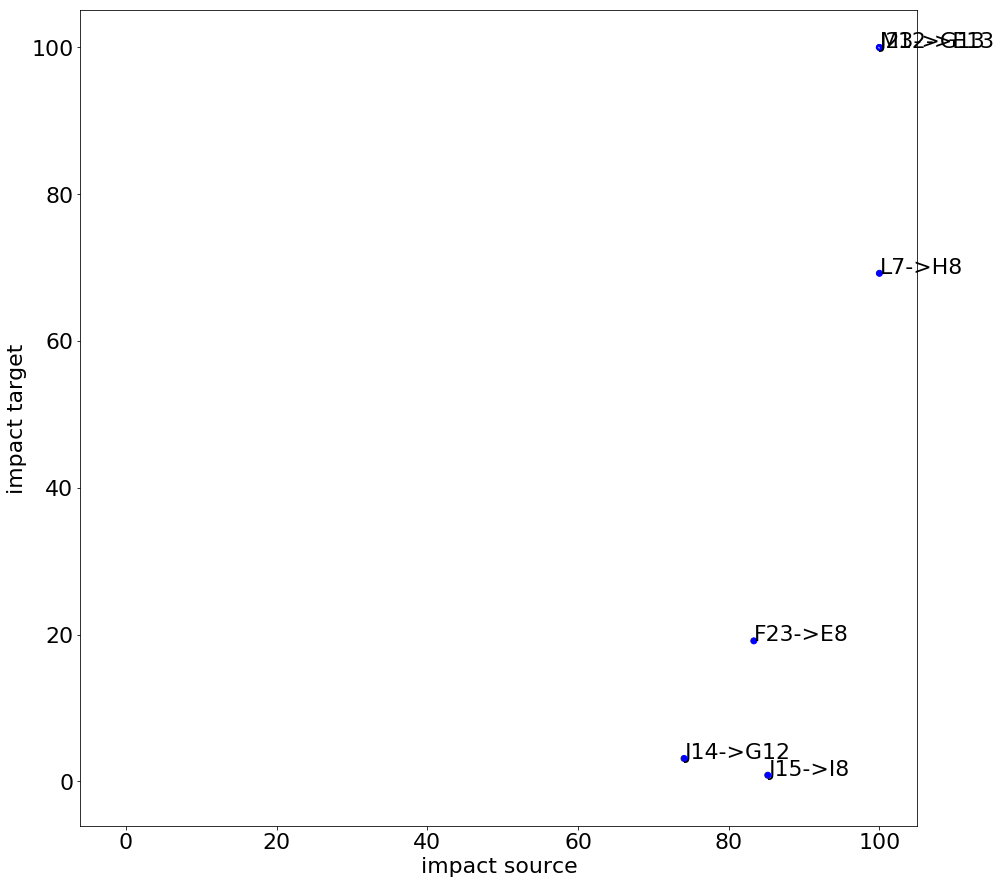

In [35]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [36]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,M12,E13,100.000000,100.000000,different,M12->E13,blue
1,1,J23,G13,100.000000,100.000000,different,J23->G13,blue
2,2,L7,H8,100.000000,69.230769,different,L7->H8,blue
3,3,F23,E8,83.333333,19.148936,different,F23->E8,blue
4,4,J14,G12,74.074074,3.125000,different,J14->G12,blue


Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones-different-ids.pdf to disk


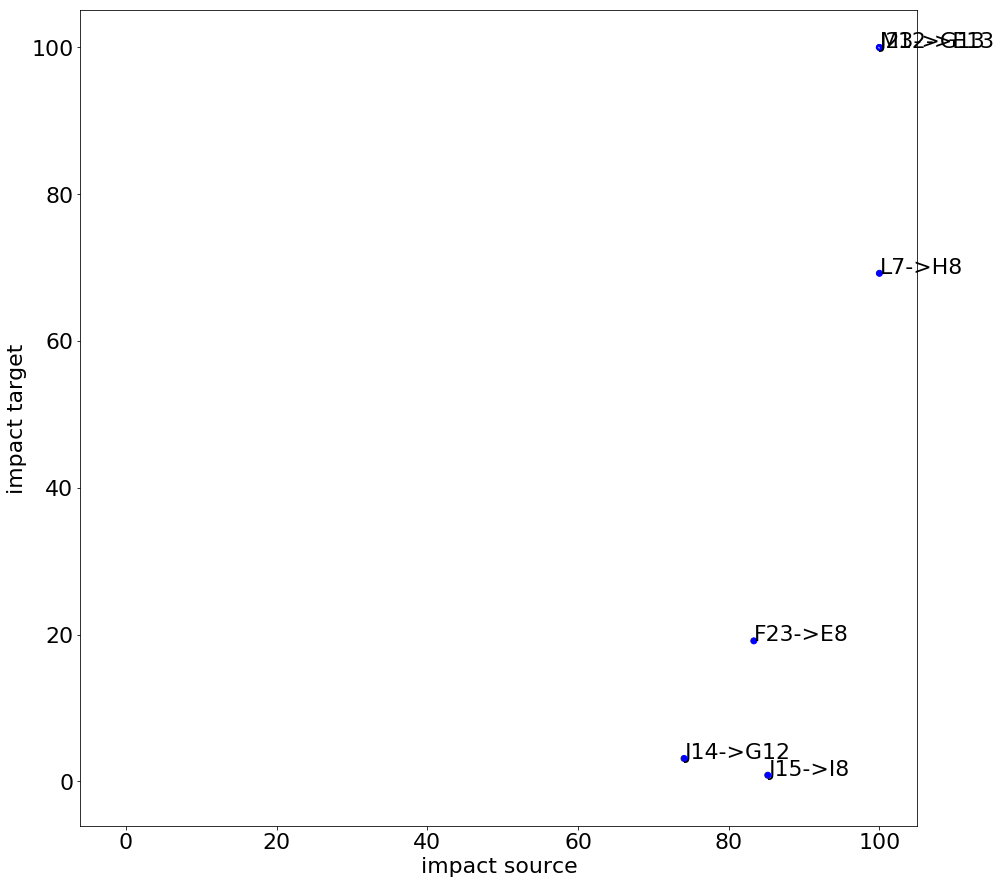

In [37]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [38]:
df.head()

,cdr3pep,freq,Barcode,Patient,totalreads,perc,Sample
0,CARGAVSLTVTPRGYFDLW,1,TCTCACAC,A10,17,5.882353,A10
1,CARGSGSLTVTPRGYFDLW,1,TCTCACAC,A10,17,5.882353,A10
2,CARGSVSLTATPRGYFDLW,1,TCTCACAC,A10,17,5.882353,A10
3,CARGSVSLTVTPRGYCDLW,1,TCTCACAC,A10,17,5.882353,A10
4,CARGSVSLTVTPRGYFDLW,10,TCTCACAC,A10,17,58.823529,A10


In [39]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [40]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient        Sample      
                   nunique names nunique names
cdr3pep                                       
CAAEGGGELHCYW            1    E4       1    E4
CAASPGIEAAAKNWLDPW       1    A9       1    A9
CADIRAYDSPLW             1    E5       1    E5
CADIWAHESPLW             1    E5       1    E5
CADIWAYDSPLW             1    E5       1    E5

In [41]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient,cdr3pep,A10,A11,A12,A13,A16,A18,A9,B13,B14,...,J24,J6,J7,J8,L2,L7,M12,M14,N13,N3
Sample,,A10,A11,A12,A13,A16,A18,A9,B13,B14,...,J24,J6,J7,J8,L2,L7,M12,M14,N13,N3
0,CAAEGGGELHCYW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAASPGIEAAAKNWLDPW,NaN,NaN,NaN,NaN,NaN,NaN,66.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CADIRAYDSPLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CADIWAHESPLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CADIWAYDSPLW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/home/barbera/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


index              cdr3pep Patient            Sample           A10 A11 A12  \
                             nunique     names nunique     names A10 A11 A12   
0    14        CAGGGGPADMDVW       2  G13, J23       2  G13, J23 NaN NaN NaN   
1   100         CARDLVGGYDHW       2   I8, J15       2   I8, J15 NaN NaN NaN   
2   107  CARDPVGWELLREVAFDIW       2    H8, L7       2    H8, L7 NaN NaN NaN   
3   173      CARGHGSGKGAFDIW       2  G12, J14       2  G12, J14 NaN NaN NaN   
4   237     CARLPGGVVVTDLDCW       2   F23, E8       2   F23, E8 NaN NaN NaN   

  A13  ... J24  J6  J7  J8  L2     L7 M12 M14 N13  N3  
  A13  ... J24  J6  J7  J8  L2     L7 M12 M14 N13  N3  
0 NaN  ... NaN NaN NaN NaN NaN    NaN NaN NaN NaN NaN  
1 NaN  ... NaN NaN NaN NaN NaN    NaN NaN NaN NaN NaN  
2 NaN  ... NaN NaN NaN NaN NaN  100.0 NaN NaN NaN NaN  
3 NaN  ... NaN NaN NaN NaN NaN    NaN NaN NaN NaN NaN  
4 NaN  ... NaN NaN NaN NaN NaN    NaN NaN NaN NaN NaN  

[5 rows x 135 columns]

In [43]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 370
cdr3's in > 1 sample: 6


In [44]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote runXX-VASAseq-noASC-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
